# Exercise "Lecture 11: Lexical Semantics"


In this set of exercises, we will convert words to vectors representing their distributional properties. 

We will start by building a word cooccurrences matrix from the Wikipedia corpus. 

We will then use Gensim and sklearn predefined methods to build an SVD word context matrix from the Wikipedia corpus used in the preceding two lectures. Finally we'll use cosine to compare the similarity between different pairs of words. 

The exercises cover the following points:

* Converting a corpus to a list of integers where each integer represent a token (this is needed for efficient computation)
* Computing a word frequency distribution 
* Creating word coocurrence matrices
* Applying SVD decomposition
* Finding neighbours

### Create a corpus from a set of files

**Exercise 1:** Store all files in 'data/wkp/' into a pandas dataframe with column Text where each row contains the content of one file

* use os.scandir to list the files in the directory, read each file into a list of strings (one string per file)   
_**Cheatsheet:**_ python_basics

In [1]:
import os
import pandas as pd

all_strings = []

for filename in os.listdir('wkp'):
    file_contents = open('wkp/' + filename).read()
    all_strings.append(file_contents)

df = pd.DataFrame(all_strings, columns=['Text'])
df

,Text
0,Airports of Serbia (Serbian Cyrillic: Аеродром...
1,An airport authority is an independent entity ...
2,"An airport bus, or airport shuttle bus or airp..."
3,Airport check-in is the process whereby passen...
4,Airport security refers to the techniques and ...
...,...
155,Votice (Czech pronunciation: [ˈvocɪtsɛ]; Germa...
156,The surface area that interacts with the worki...
157,William Hogarth (; 10 November 1697 – 26 Octo...
158,Wolfgang Nordwig (born 27 August 1943) is a fo...


**Exercise 2:** Clean the corpus

* Store the content of the 'Text" column into a string (cf. Pandas CS, "Extracting all text from a colum")
* Tokenize the string into words (cf. NLTK CS)
* Print out the first and the last 10 words of your list of tokens. Do you see tokens that may not be useful for learning word representations ?
* Lower case all tokens and remove all tokens that contains characters that are not letters

In [2]:
from nltk.tokenize import word_tokenize

text = ' '.join(df['Text'])
tokenized_text = word_tokenize(text)

print(tokenized_text[:10])
print(tokenized_text[-10:])

tokenized_text = [token.lower() for token in tokenized_text]
tokenized_text = [token for token in tokenized_text if token.isalpha()]

print()
print(tokenized_text[:10])
print(tokenized_text[-10:])

['Airports', 'of', 'Serbia', '(', 'Serbian', 'Cyrillic', ':', 'Аеродроми', 'Србије', ')']
['Italy', '==', 'References', '==', '==', 'External', 'links', '==', 'Official', 'website']

['airports', 'of', 'serbia', 'serbian', 'cyrillic', 'аеродроми', 'србије', 'is', 'a', 'serbian']
['with', 'gbely', 'slovakia', 'montevago', 'italy', 'references', 'external', 'links', 'official', 'website']


### Create a frequency distribution

**Exercise 3:** Create a frequency distribution from the list of tokens created in the previous exercise. Print out the 10 most and least frequent tokens.

_**Cheatsheet:**_ lexical semantics and stats_and_visu 
* Create a frequency distribution by iterating over the list of token while incrementing each token frequency accordingly
* Sort the tokens by decreasing frequency into a list
* Print out the first and last 10 tokens of this list (which tokens are most and least frequent ?)

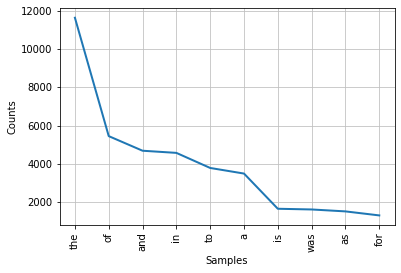

[('the', 11652), ('of', 5443), ('and', 4677), ('in', 4564), ('to', 3773), ('a', 3479), ('is', 1633), ('was', 1596), ('as', 1495), ('for', 1284)]
[('linhart', 1), ('strakosch', 1), ('manó', 1), ('kogutowicz', 1), ('cartographer', 1), ('teschen', 1), ('admiral', 1), ('eugen', 1), ('gbely', 1), ('montevago', 1)]


In [3]:
%matplotlib inline

import nltk

frequency_dist = nltk.FreqDist(tokenized_text)
frequency_dist.plot(10)

print(frequency_dist.most_common(10))
print(frequency_dist.most_common()[-10:])

### Convert the corpus to a list of integers

**Exercise 4:** Convert the list of tokens created in Exercise 2 (corpus cleaning) into a list of integers

* Create a dictionary mapping each token to a distinct integer (Cf. Lexical Semantics CS)
* Use this dictionary to convert each token from your cleaned corpus (Exercise 2) into an integer.

In [ ]:
from collections import defaultdict

token2int = defaultdict(lambda: len(token2int)) 

integer_text = [token2int[token] for token in tokenized_text]
integer_text

### Create a dictionary of co-occurences

**Exercise 5:** In the previous exercise, you created a list of integers where each integer is the identifier for the corresponding token in your cleaned up corpus. Iterate over that list and for each "integer token" *i*:

* get the neihbours of *i* within a window of size 5 (only looking at the right side of *i*)
* store these neihbours in a dictionary of coocurrences of the form {(i,j):f,} where *(i,j)* are neighbours and *f* is the frequency of the co-occurence 
* Sort co-occurences using integer order i.e., if the neighbour *n* is represented by an identifier smaller than *i*, store the co-occurence as *(n,i)*, otherwise as *(i,n)* .


In [ ]:
cooccurrences = defaultdict(int)

for i, token in enumerate(integer_text[:-5]):
    for j in range(1, 6):
        neighbour_token = integer_text[i + j]
        cooccurrences[(min(token, neighbour_token), max(token, neighbour_token))] += 1
cooccurrences

### Compute the SVD decomposition of the Co-occurence Matrix

**Exercise 6:** Compute the  SVD decomposition of the word co-occurence matrix you just created

* Create a matrix A of size (vocab_length, vocab_length)
* Fill each cell *(i,j)* in this matrix with the frequency the co-occurrence between *i* and *j*
* Use numpy [svd](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) method from the linalg module
* full_matrices = False ensures that reduced SVD is applied (rather than full SVD)

A = U * s * V

In [6]:
import numpy as np

matrix = np.zeros((len(token2int), len(token2int)))
for (i, j), value in cooccurrences.items():
    matrix[i, j] = value
matrix

array([[  9.,  37.,   5., ...,   0.,   0.,   0.],
       [  0., 627.,   9., ...,   1.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [7]:
U, s, V = np.linalg.svd(matrix, full_matrices=False)

17627

**Exercise 7 (PROVIDED):** Define a function which returns the similarity between two words and apply to measure the similarity of airport and news, airport and international, john and peter

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

def similarity(embedding, word1, word2):
  if word1 in vocab and word2 in vocab:
    v1 = embedding[token2int[word1]].reshape(1, -1)  
    v2 = embedding[token2int[word2]].reshape(1, -1)
    return cosine_similarity(v1, v2)[0][0]

print('cosine(airport, news) =', similarity(U, 'airport', 'news'))
print('cosine(airport, international) =', similarity(U, 'airport', 'international'))
print('cosine(john, peter) =', similarity(U, 'john', 'peter'))

NameError: name 'U' is not defined

**Exercise 8 (PROVIDED):** Define a function which outputs the neighbours of a word

In [9]:
reverse_vocab = {j: i for i, j in token2int.items()}

def most_similar(embedding, word, n=10):
  if word in vocab:
    v = embedding[token2int[word]].reshape(1, -1)
    scores = cosine_similarity(v, embedding).reshape(-1)
    result = []

    # argsort gives n-best scores
    for i in reversed(scores.argsort()[-n:]):
      result.append((reverse_vocab[i], scores[i]))
    return result

print(most_similar(U, 'airport'))
print(most_similar(U, 'news'))

NameError: name 'U' is not defined

# 2. Creating a word cooccurence matrix using vectorizers

In the preceding section, we created the word co-occurence matrix programatically (we wrote the algorithm for deriving the matrix from the corpus). There is in fact a much quicker way to do this which can be summarised as follows:

* Use sklearn vectorizer methods (CountVectorizer, TfidfVectorizer) to convert the corpus (a list of documents) to a _**document/token matrix**_
* Use algebra to create the token/token matrix.  To create a _**token co-occurence matrix**_ , we simply multiply the transpose of the documents/tokens matrix by the documents/token matrix
    * shape of X: (#doc, #tokens)   
    * shape of X transpose: (#tokens, #doc)   
    * shape of X transpose * X : (#tokens, #doc) * (#doc, #tokens) = (#tokens, #tokens)


**Exercise 9:** Convert the Wikipedia files into a list of strings and preprocess each string

* Convert the Text column of the dataframe created in Exercise 1 into a list of strings
* Define a preprocessing function which takes a list of strings as input, tokenizes each string, lowercases the tokens, only keep tokens made of letters (use isalpha() method), convert the list of cleaned tokens back into a string (use "join") and stores the result into a lists of preprocessed strings

In [ ]:
strings = df['Text'].tolist()
strings = [word_tokenize(string) for string in strings]
strings = [[token for token in string if token.isalpha()] for string in strings]
strings = [[token.lower() for token in string] for string in strings]
strings = [' '.join(string) for string in strings]
strings

**Exercice 10:** Creating a document / token matrix

* Use sklearn [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) method which transforms a list of documents (strings) into a a document/token matrix where each cell indicates the frequency of a token in a document
* Use the stop_words option to remove stop words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_model = CountVectorizer(ngram_range=(1,1), stop_words='english') 
X = count_model.fit_transform(strings)

print(X)
print(X.todense())

  (0, 399)	8
  (0, 13795)	8
  (0, 13796)	2
  (0, 3784)	1
  (0, 17230)	1
  (0, 17246)	1
  (0, 3076)	2
  (0, 11145)	1
  (0, 10940)	1
  (0, 6969)	1
  (0, 10841)	1
  (0, 10608)	1
  (0, 3309)	1
  (0, 6642)	1
  (0, 398)	9
  (0, 6058)	1
  (0, 8134)	1
  (0, 6579)	1
  (0, 9379)	3
  (0, 15314)	1
  (0, 9443)	1
  (0, 4229)	1
  (0, 9390)	1
  (0, 7742)	1
  (0, 1564)	2
  :	:
  (159, 9487)	1
  (159, 11463)	1
  (159, 17173)	1
  (159, 4285)	1
  (159, 6766)	1
  (159, 10121)	1
  (159, 3136)	1
  (159, 1208)	1
  (159, 7358)	1
  (159, 1647)	1
  (159, 10177)	1
  (159, 11462)	1
  (159, 10614)	4
  (159, 16793)	1
  (159, 9042)	1
  (159, 14779)	1
  (159, 9500)	1
  (159, 8584)	1
  (159, 2368)	1
  (159, 898)	3
  (159, 15471)	1
  (159, 224)	1
  (159, 5341)	1
  (159, 6364)	1
  (159, 10148)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Exercice 11:** Print out the vocabulary i.e., the tokens contained in the document/token matrix

In [ ]:
print(count_model.vocabulary_)

**Exercise 12:** Create the co-occurence matrix.

To create a token co-occurence matrix, we simply multiply the transpose of the documents/tokens matrix by the documents/token matrix

* shape of X: (#doc, #tokens)
* shape of X transpose: (#tokens, #doc)
* shape of X transpose * X : (#tokens, #doc) * (#doc, #tokens) = (#tokens, #tokens)

In [24]:
U = X.transpose() * X
U

<17304x17304 sparse matrix of type '<class 'numpy.int64'>'
	with 28960976 stored elements in Compressed Sparse Column format>

**Exercise 13:** Use the function given in Exercise 7 to measure the similarity of airport and news, airport and international, john and peter

* You'll need to modify that part of the function which retrieves the identifier of a word

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

def similarity(embedding, word1, word2):
    v1 = embedding[token2int[word1]].reshape(1, -1)  
    v2 = embedding[token2int[word2]].reshape(1, -1)
    return cosine_similarity(v1, v2)[0][0]

print('cosine(airport, news) =', similarity(U, 'airport', 'news'))
print('cosine(airport, international) =', similarity(U, 'airport', 'international'))
print('cosine(john, peter) =', similarity(U, 'john', 'peter'))

cosine(airport, news) = 0.3706508364612424
cosine(airport, international) = 0.023942692718696652
cosine(john, peter) = 0.030502480855017212
